<a href="https://colab.research.google.com/github/Yogesh914/fakenews/blob/main/Training_File_Fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip && rm *.zip.

Archive:  fake-and-real-news-dataset.zip
replace Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace True.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
rm: cannot remove '*.zip.': No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
# Combine the sub-datasets in one.
frames = [true.loc[:5000][:], fake.loc[:5000][:]]
df = pd.concat(frames)
df.tail()

,title,text,subject,date,label
4996,Justice Department Announces It Will No Longe...,Republicans are about to lose a huge source of...,News,"August 18, 2016",0
4997,WATCH: S.E. Cupp Destroys Trump Adviser’s ‘Fa...,A pawn working for Donald Trump claimed that w...,News,"August 18, 2016",0
4998,WATCH: Fox Hosts Claim Hillary Has Brain Dama...,Fox News is desperate to sabotage Hillary Clin...,News,"August 18, 2016",0
4999,CNN Panelist LAUGHS In Corey Lewandowski’s Fa...,As Donald Trump s campaign continues to sink d...,News,"August 18, 2016",0
5000,Trump Supporter Who Wants To Shoot Black Kids...,"Hi folks, John Harper here, at least if you as...",News,"August 18, 2016",0


In [ ]:
X = df.drop('label', axis=1) 
y = df['label']
# Delete missing data
df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace=True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np
import itertools
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
print(pred)

accuracy:   0.998
[0 1 1 ... 1 0 0]


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def validate(model):
  cv = KFold(n_splits=5, shuffle=True, random_state=0)
  scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
  return round(np.mean(scores), 3)
scores_passiveAggressive = validate(classifier)
print(scores_passiveAggressive)


0.999


In [ ]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import statsmodels.api as sm

In [ ]:
#SVC model
clfSVC = svm.SVC()
clfSVC.fit(X_train, y_train)
pred_SVC = clfSVC.predict(X_test)

In [ ]:
#Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [ ]:
#Lasso model
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train) 
y_lasso = model_lasso.predict(X_train)

params = [.01, .1, 1, 10, 100]
lr = LinearRegression()

lr.fit(X_train, y_lasso)
pred_train_lasso = lr.predict(X_test)
results = []

print(results)

[]


In [ ]:
#GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_train_gnb = gnb.predict(X_test)

In [ ]:
#MultinomialNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred_train_mnb = mnb.predict(X_test)

In [ ]:
#ComplementNB model
cnb = ComplementNB()
cnb.fit(X_train, y_train)
pred_train_cnb = cnb.predict(X_test)

In [ ]:
#BernoulliNB model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred_train_bnb = bnb.predict(X_test)

In [ ]:
#CategoricalNB model
catnb = CategoricalNB()
catnb.fit(X_train, y_train)
pred_train_catnb = catnb.predict(X_test)

In [ ]:
#DecisionTreeClassifier model
clfDTC = DecisionTreeClassifier(max_depth=4)
clfDTC.fit(X_train, y_train)
pred_train_DTC = clfDTC.predict(X_test)
print(validate(clfDTC))


0.999


In [ ]:
print("PassiveAggresive Classifer")
print(mean_squared_error(y_test, pred))
print(r2_score(y_test.values, pred))
print("SVM")
print(mean_squared_error(y_test, pred_SVC))
print(r2_score(y_test.values, pred_SVC))
print("Linear Regression")
print(mean_squared_error(y_test, pred_lr))
print(r2_score(y_test.values, pred_lr))
print("LASSO Linear Regression")
print(mean_squared_error(y_test, pred_train_lasso))
print(r2_score(y_test.values, pred_train_lasso))
print("GaussianNB")
print(mean_squared_error(y_test, pred_train_gnb))
print(r2_score(y_test.values, pred_train_gnb))
print("MultinomialNB")
print(mean_squared_error(y_test, pred_train_mnb))
print(r2_score(y_test.values, pred_train_mnb))
print("ComplementNB")
print(mean_squared_error(y_test, pred_train_cnb))
print(r2_score(y_test.values, pred_train_cnb))
print("BernoulliNB")
print(mean_squared_error(y_test, pred_train_bnb))
print(r2_score(y_test.values, pred_train_bnb))
print("CategoricalNB")
print(mean_squared_error(y_test, pred_train_catnb))
print(r2_score(y_test.values, pred_train_catnb))
print("DecisionTreeClassifier")
print(mean_squared_error(y_test, pred_train_DTC))
print(r2_score(y_test.values, pred_train_DTC))


PassiveAggresive Classifer
0.001999000499750125
0.9920009594051687
SVM
0.001999000499750125
0.9920009594051687
Linear Regression
4.615896963248521e+17
-1.8470604282089144e+18
LASSO Linear Regression
0.2500537416902354
-0.0005950628424817861
GaussianNB
0.010994502748625687
0.9560052767284284
MultinomialNB
0.02798600699650175
0.8880134316723631
ComplementNB
0.02798600699650175
0.8880134316723631
BernoulliNB
0.005997001499250375
0.9760028782155064
CategoricalNB
0.5097451274362819
-1.0397553516819569
DecisionTreeClassifier
0.0009995002498750624
0.9960004797025844


Confusion matrix, without normalization


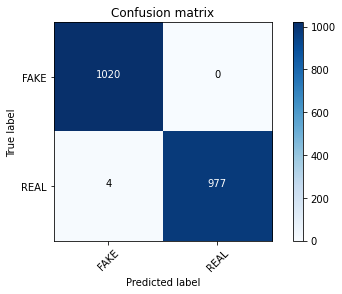

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


BNB
Confusion matrix, without normalization


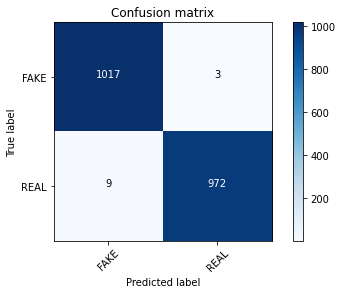

In [ ]:
print("BNB")
cm = metrics.confusion_matrix(y_test, pred_train_bnb)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#cm = metrics.confusion_matrix(y_test, pred_lr)
#plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
#print("LASSO Linear Regression")
#cm = metrics.confusion_matrix(y_test, pred_train_lasso)
#plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#print("BernoulliNB")
#print(mean_squared_error(y_test, pred_train_bnb))
#cm = metrics.confusion_matrix(y_test, pred_SVC)
#plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#print("CategoricalNB")
#print(mean_squared_error(y_test, pred_train_DTC))
#cm = metrics.confusion_matrix(y_test, pred_SVC)
#plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


DTC
Confusion matrix, without normalization


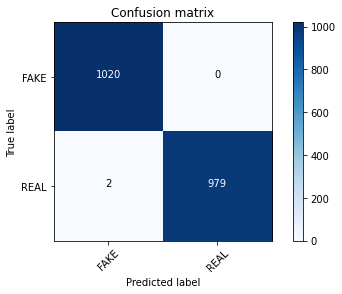

In [ ]:
print("DTC")
cm = metrics.confusion_matrix(y_test, pred_train_DTC)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
# Tokenization
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split() 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
# Vectorization
val = tfidf_v.transform([review]).toarray()
# Predict 
classifier.predict(val)

lr.predict(val)
#Bayes
#SVC
#Decision Tree


array([0.5024372])

In [ ]:
import pickle
pickle.dump(clfSVC, open('modelbnb.pkl', 'wb'))




In [ ]:
# Load model and vectorizer
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0])